In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [159]:
data = pd.read_csv('data.csv')

In [160]:
data.head()

,Date,Location,Operator,Aircraft_Type,Registration,Fatalities,Total_Onboard,Ground_Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,?,1,2,0
1,1909-09-07,"Juvisy-sur-Orge, France",?,Wright Byplane,SC1,1,1,0
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,?,5,5,0
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,?,1,1,0
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),?,14,20,0


Below are the analysis done to the data. Most are pretty self-explainatory.

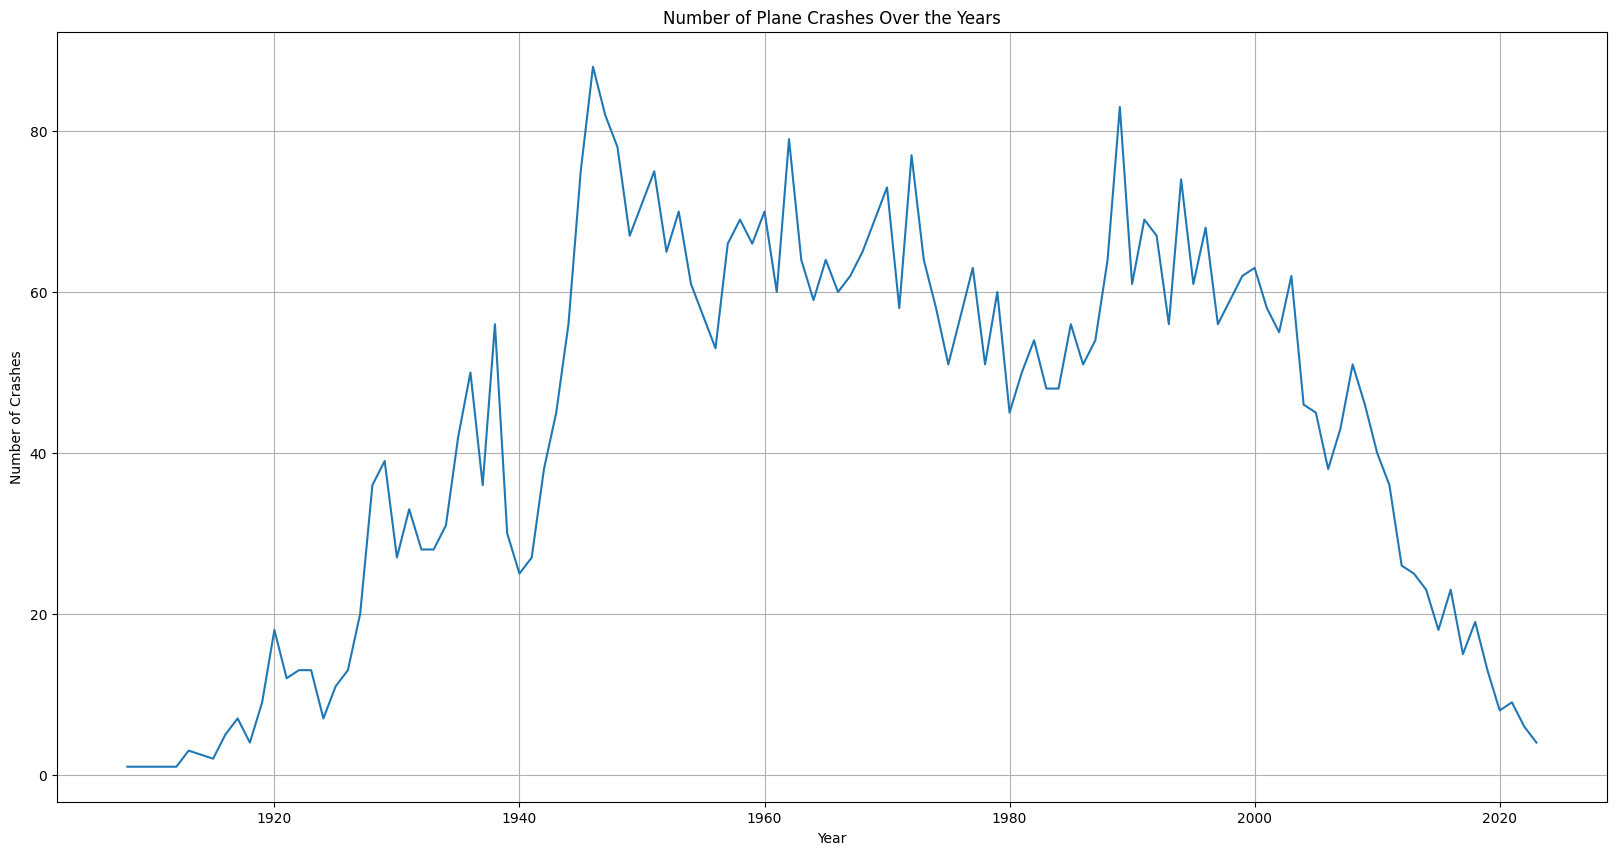

In [161]:
# Get the year from the date column and convert to int
data['Year'] = pd.to_datetime(data['Date']).dt.year
# Count the number of crashes per year
crashes_per_year = data['Year'].value_counts().sort_index()
# Plotting the trend of crashes over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title('Number of Plane Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

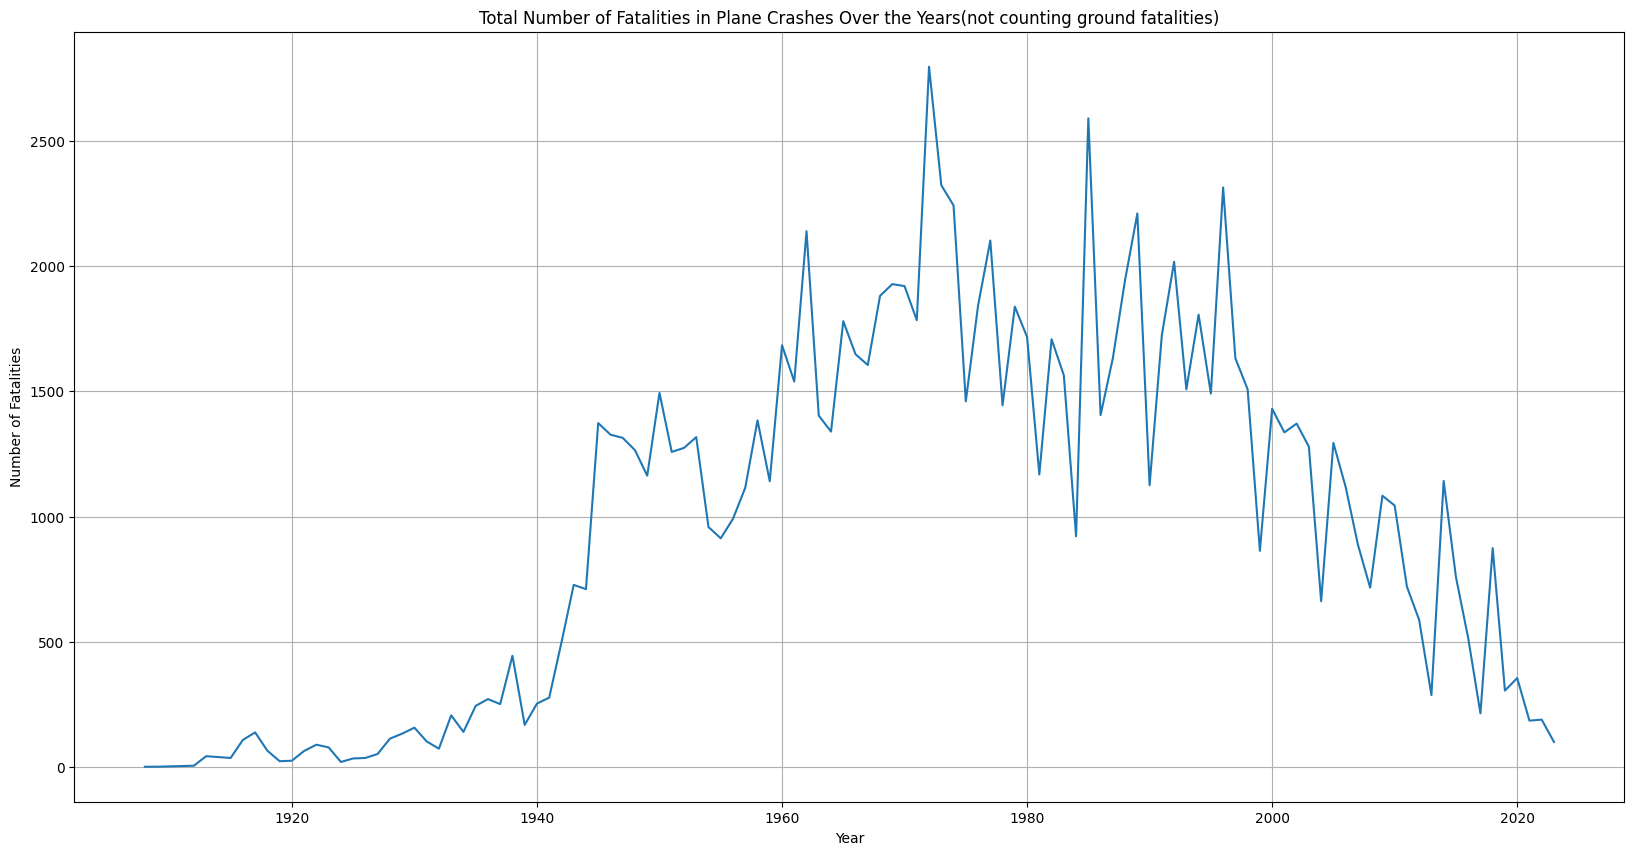

In [162]:
# Aggregating the total fatalities by year
fatalities_per_year = data.groupby('Year')['Fatalities'].sum()
# Plotting the trend of fatalities over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x=fatalities_per_year.index, y=fatalities_per_year.values)
plt.title('Total Number of Fatalities in Plane Crashes Over the Years(not counting ground fatalities)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

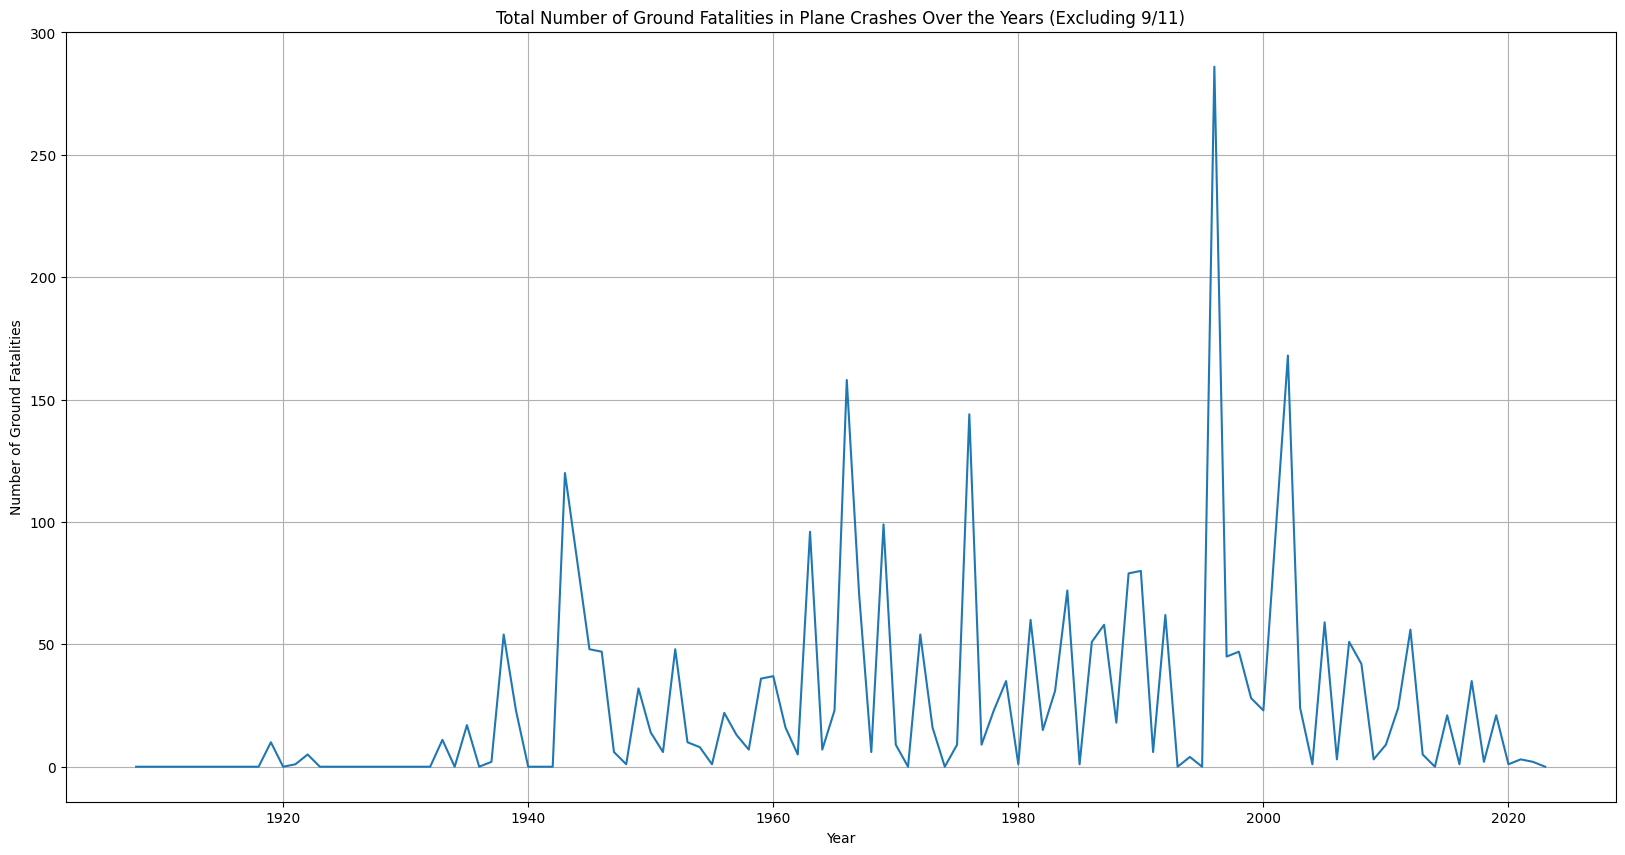

In [163]:
# Excluding the data for the year 2001 (the year of the 9/11 attacks) from the analysis
data_excluding_2001 = data[data['Year'] != 2001]
# Aggregating the total ground fatalities by year, excluding the year 2001
ground_fatalities_excluding_2001 = data_excluding_2001.groupby('Year')['Ground_Fatalities'].sum()
# Plotting the trend of ground fatalities over the years, excluding 2001
plt.figure(figsize=(20, 10))
sns.lineplot(x=ground_fatalities_excluding_2001.index, y=ground_fatalities_excluding_2001.values)
plt.title('Total Number of Ground Fatalities in Plane Crashes Over the Years (Excluding 9/11)')
plt.xlabel('Year')
plt.ylabel('Number of Ground Fatalities')
plt.grid(True)
plt.show()

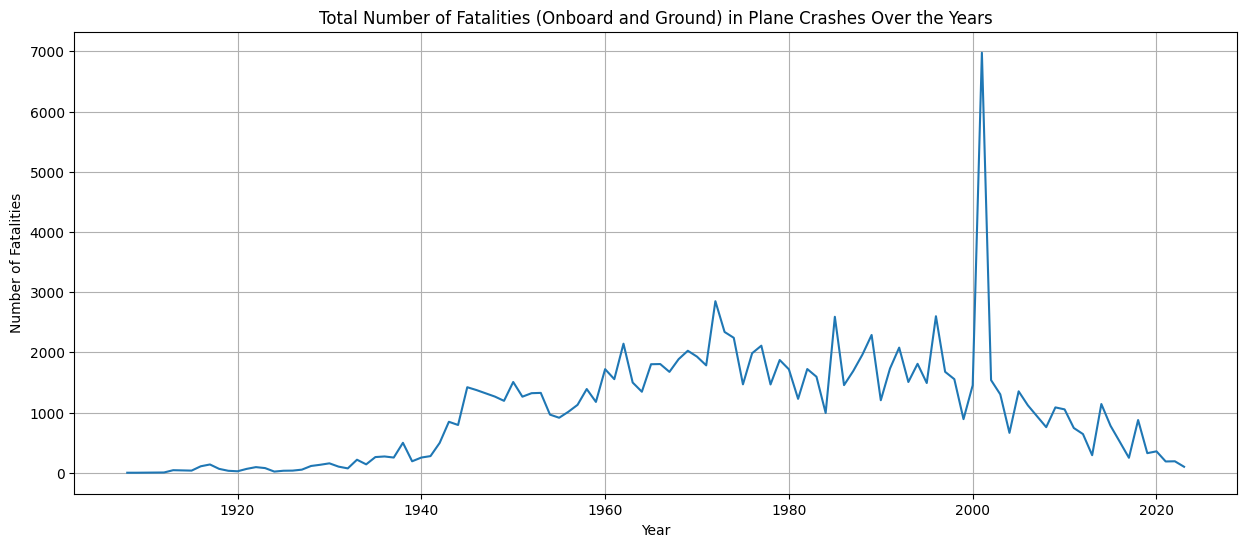

In [164]:
# Correcting the selection of multiple columns in groupby using a list
total_fatalities_per_year = data.groupby('Year')[['Fatalities', 'Ground_Fatalities']].sum().sum(axis=1)

# Plotting the trend of total fatalities over the years with the corrected method
plt.figure(figsize=(20, 10))
sns.lineplot(x=total_fatalities_per_year.index, y=total_fatalities_per_year.values)
plt.title('Total Number of Fatalities (Onboard and Ground) in Plane Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

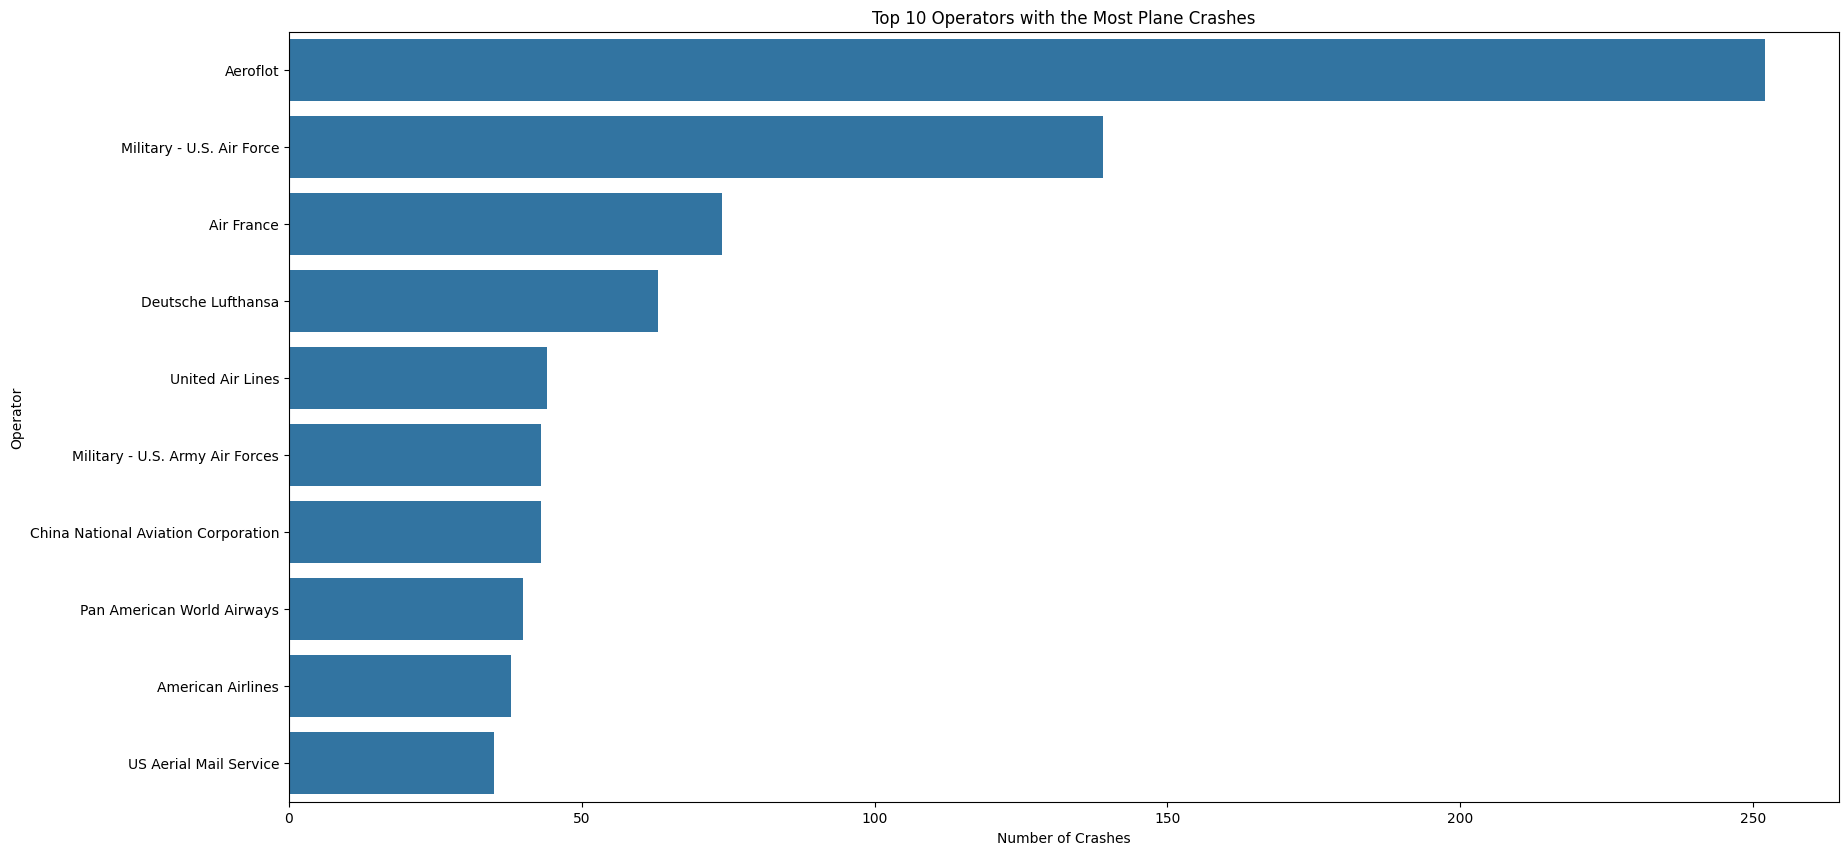

In [165]:
# Count the number of crashes per operator
crashes_per_operator = data['Operator'].value_counts()

# Filter for top 10 with head(10)
top_operators = crashes_per_operator.head(10)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=top_operators.values, y=top_operators.index)
plt.title('Top 10 Operators with the Most Plane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

Operators with least crashes are not counted since it's one crash for all the of them. Ones with no crashes are not counted.

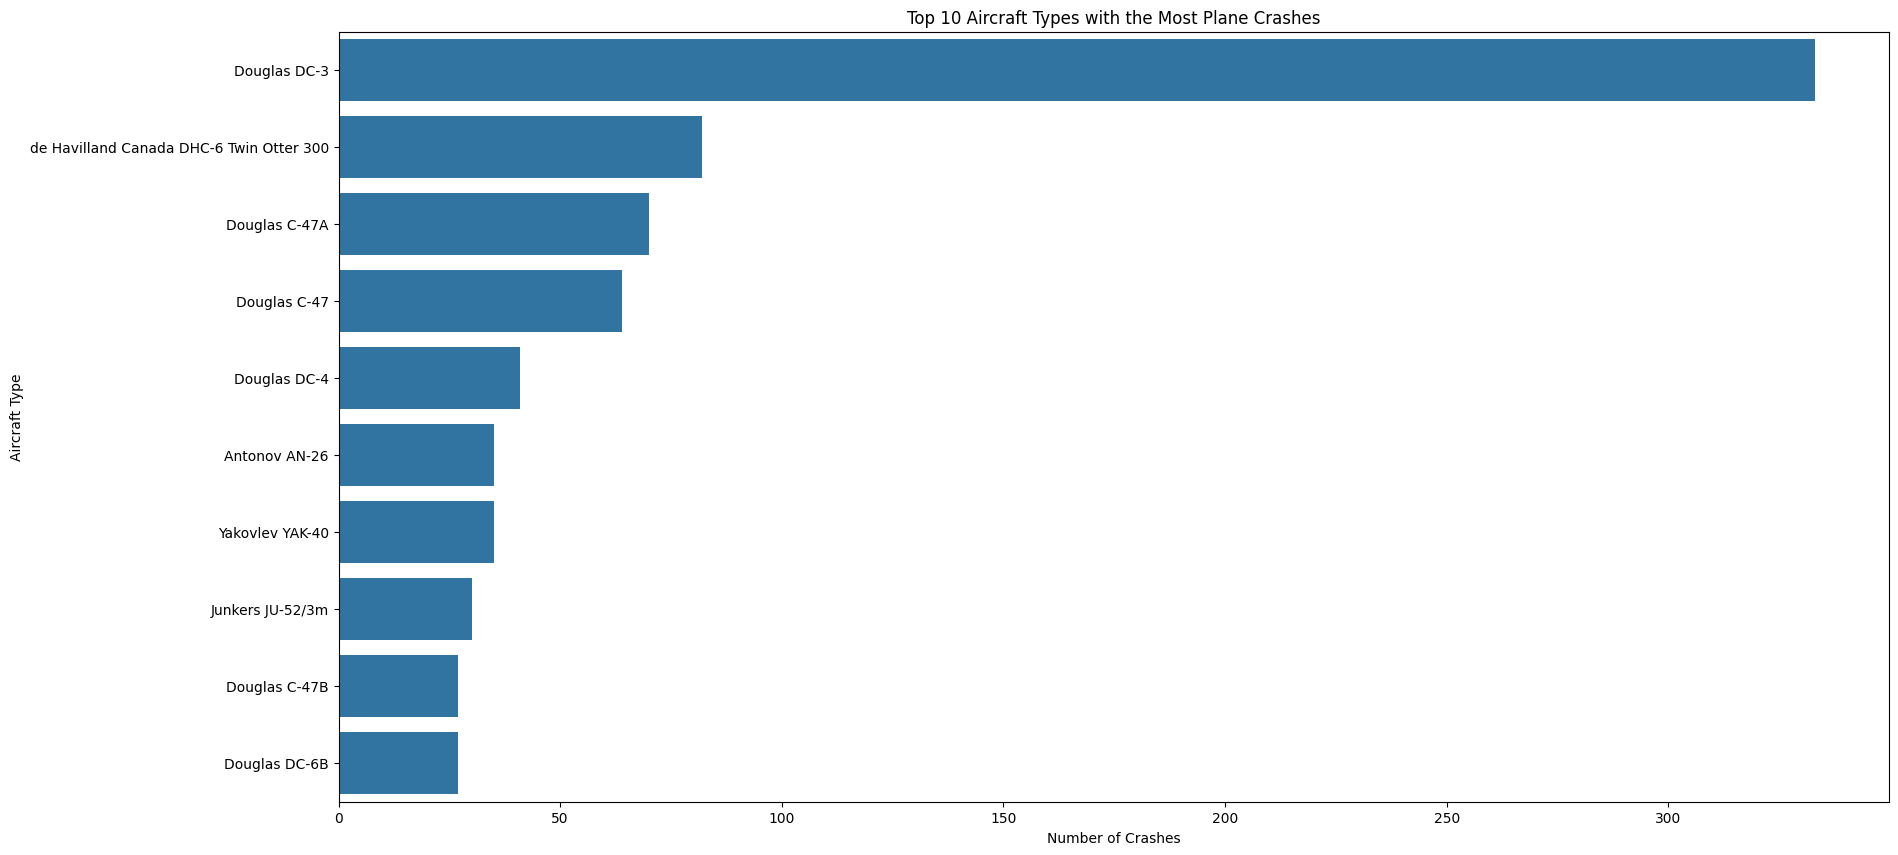

In [166]:
# Count the number of crashes per aircraft type
crashes_per_aircraft_type = data['Aircraft_Type'].value_counts()

# Filter for top 10
top_aircraft_types = crashes_per_aircraft_type.head(10)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=top_aircraft_types.values, y=top_aircraft_types.index)
plt.title('Top 10 Aircraft Types with the Most Plane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Aircraft Type')
plt.show()

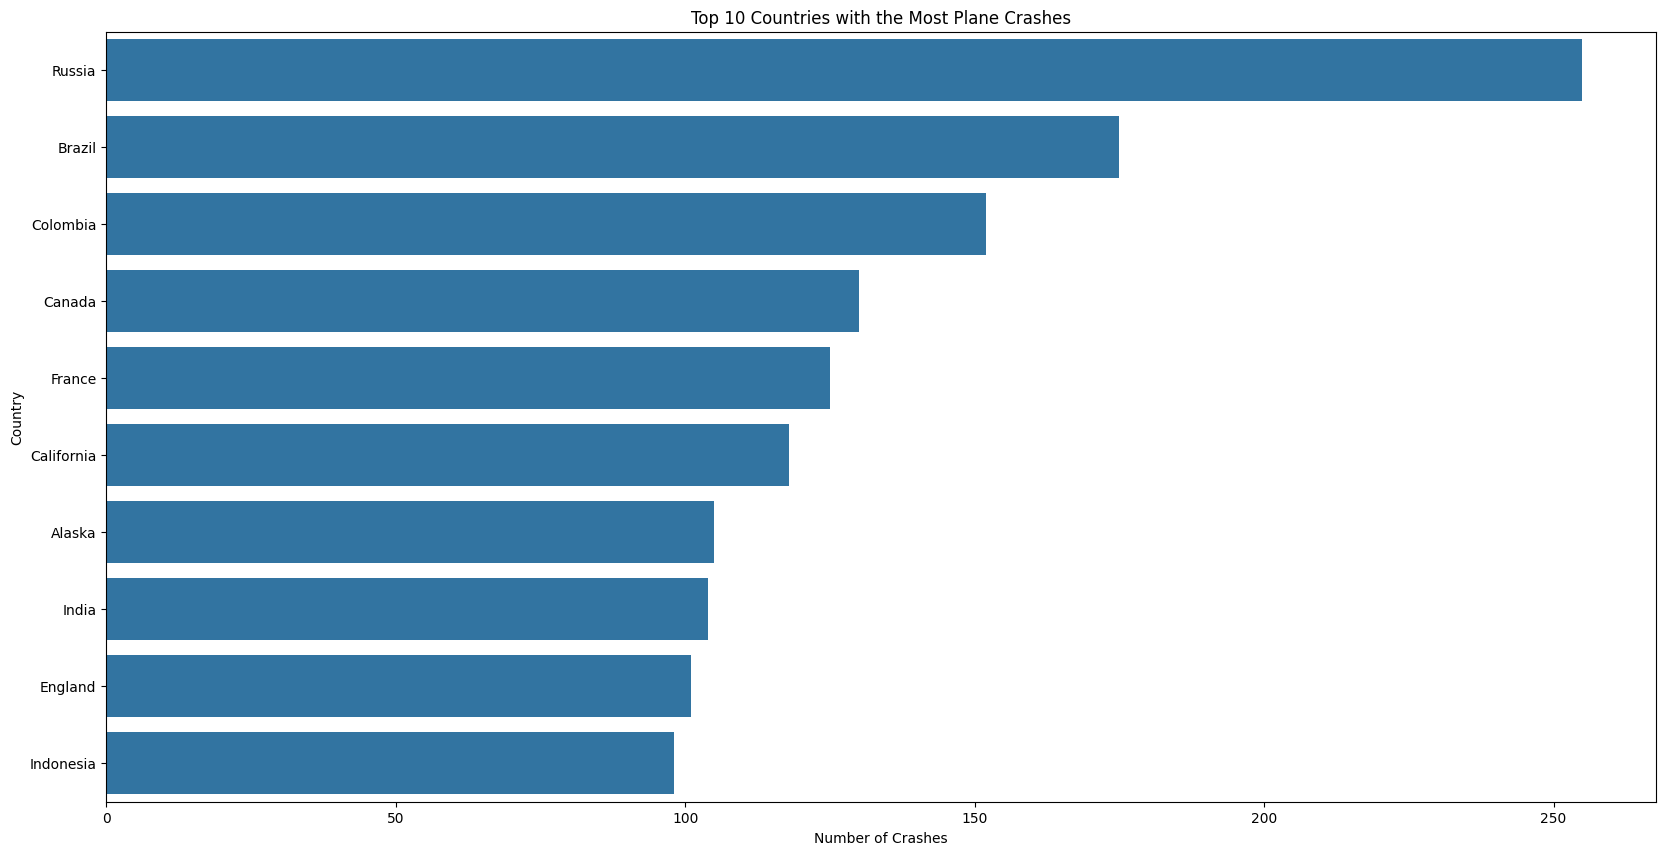

In [167]:
# Simplify the location data by extracting only the country names
# I probably should've seperated the country names when importing data
data['Country'] = data['Location'].apply(lambda x: x.split(',')[-1].strip())

# Count the number of crashes per country
crashes_per_country = data['Country'].value_counts()

# Use head to filter out the top 10 countries with the most crashes
top_countries = crashes_per_country.head(10)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Most Plane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Country')
plt.show()


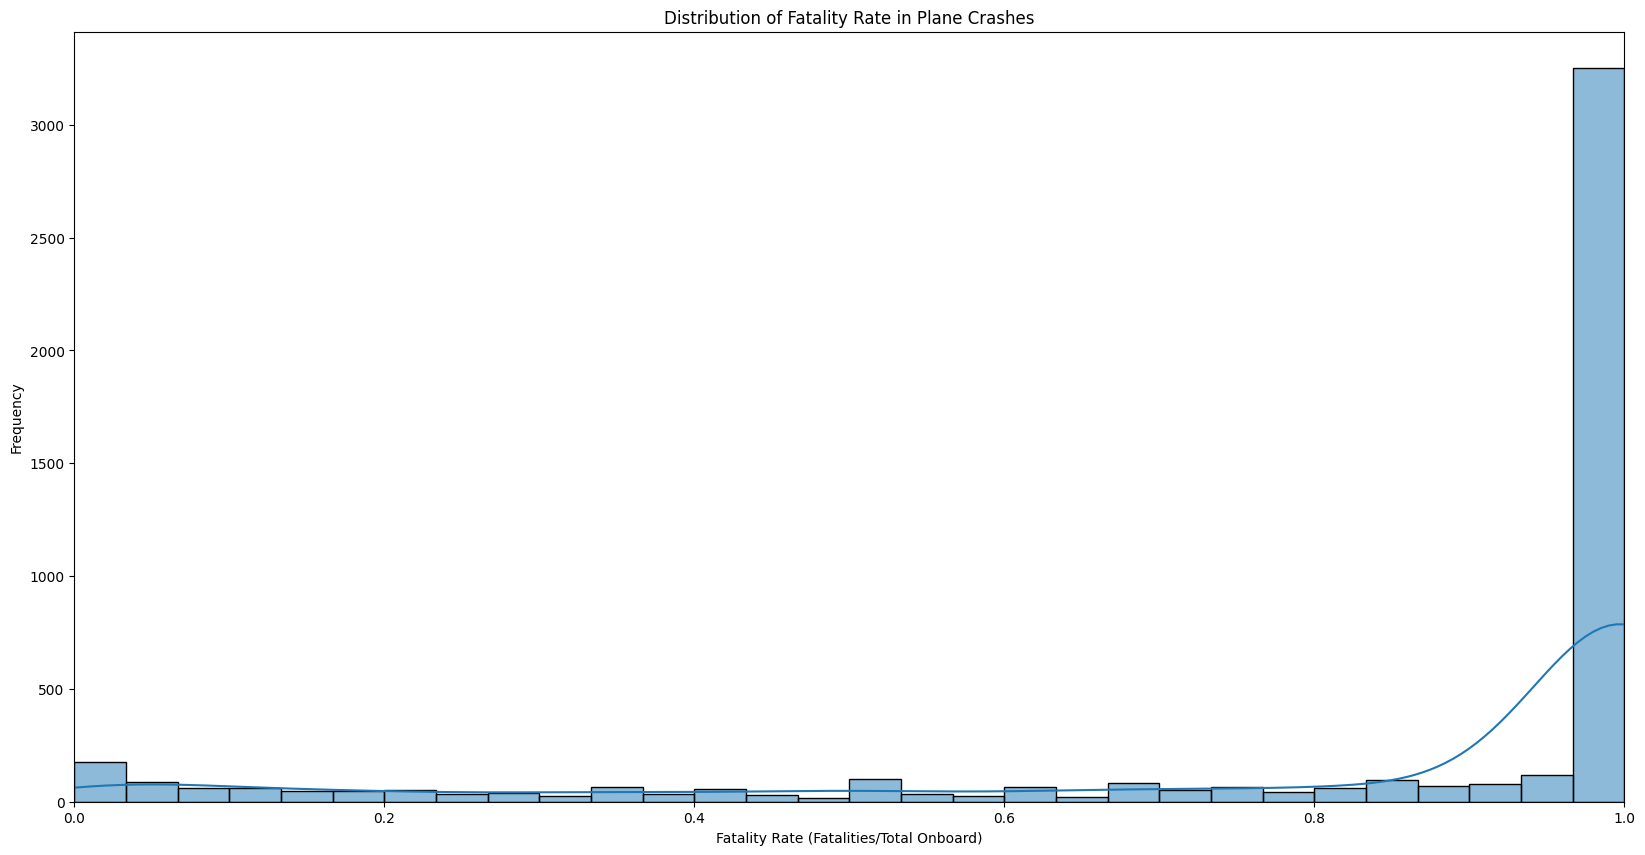

In [168]:
# Convert 'Fatalities' and 'Total_Onboard' to numeric value, since they are currently strings
data['Fatalities'] = pd.to_numeric(data['Fatalities'], errors='coerce')
data['Total_Onboard'] = pd.to_numeric(data['Total_Onboard'], errors='coerce')

# Calculate the fatality rate (fatalities/total onboard)
data['Fatality_Rate'] = data['Fatalities'] / data['Total_Onboard']

# Plotting the distribution of fatality rate
plt.figure(figsize=(20, 10))
sns.histplot(data['Fatality_Rate'], bins=30, kde=True)
plt.title('Distribution of Fatality Rate in Plane Crashes')
plt.xlabel('Fatality Rate (Fatalities/Total Onboard)')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis to valid fatality rate values
plt.show()

Seems most of the crashes are completely fatal. Not surpising. Plotting another graph, excluding 100% fatalities to see how the rest are distributed.

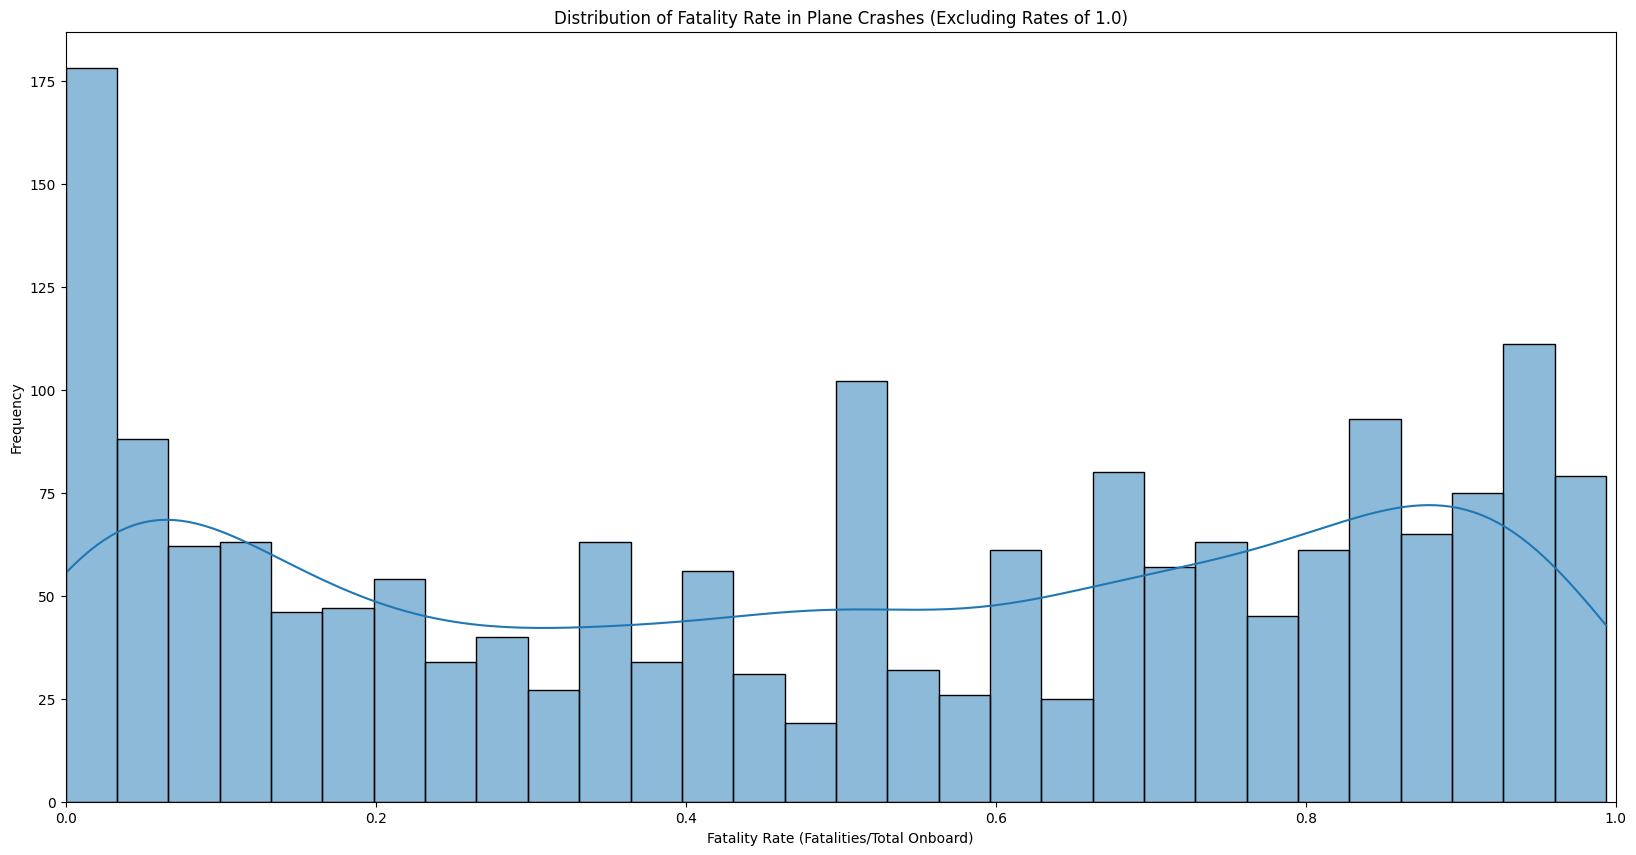

In [169]:
# Filtering out the data points with a fatality rate of 1.0
data_excluding_full_fatalities = data[data['Fatality_Rate'] < 1.0]

# Plotting the distribution of fatality rate excluding rates of 1.0
plt.figure(figsize=(20, 10))
sns.histplot(data_excluding_full_fatalities['Fatality_Rate'], bins=30, kde=True)
plt.title('Distribution of Fatality Rate in Plane Crashes (Excluding Rates of 1.0)')
plt.xlabel('Fatality Rate (Fatalities/Total Onboard)')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis to valid fatality rate values
plt.show()

Visualizing correlation between countries with most crashes and operators with most crashes.